# Exercizes on clustering

Here you can find a program to read a data file in csv format. 

The data file has the following heading:
    number of samples, number of features
    list of the names of the features (separated by comma)
    
The remaining lines contain an example per row.
For each row there is a list of real numbers (commas separated) which are the feature values.   

In [84]:
# this function reads the data file, loads the configuration attributes specifiefd in the heading
# (numer of examples and features), the list of feature names
# and loads the data in a matrix named data    
def load_data(file_path, file_name):
   with open(join(file_path, file_name)) as csv_file:
       data_file = csv.reader(csv_file,delimiter=',')
       temp1 = next(data_file)
       n_samples = int(temp1[0])
       print("n_samples=" + str(n_samples))
       n_features = int(temp1[1])
       temp2 = next(data_file)
       feature_names = np.array(temp2[:n_features])

       data_list = [iter for iter in data_file]
               
       data = np.asarray(data_list, dtype=np.float64)                  
       
   return(data,feature_names,n_samples,n_features)

In [85]:
def run_kmeans(n_samples, data, k = 3):
    from sklearn.cluster import KMeans
    import numpy as np

    np.random.seed(5)

    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(data)

    #i=0
    #for i in range(n_samples):
    #    print("Example n."+str(i)+"=("+str(data[i,0])+","+str(data[i,1])+")")
    #    print("in cluster n."+str(kmeans.labels_[i]))

    return kmeans

In [86]:
def plot_clusters(data, n_samples, kmeans):
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(8,8))

    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)
    ax.set_title('Clustered points in dataset n. 1')

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # set the list of colors to be selected when plotting the different clusters
    color=['b','g','r','c','m','y','k','w']
        
    #plot the dataset
    for clu in range(k):
        # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
        data_list_x = [data[i,0] for i in range(n_samples) if kmeans.labels_[i]==clu]
        data_list_y = [data[i,1] for i in range(n_samples) if kmeans.labels_[i]==clu]
        plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)

    plt.show()

In [87]:
def plot_dataset(feature_names, data):
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(8,8))

    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)
    ax.set_title('Dataset n. 1 of data points')

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

    #plot the dataset
    plt.plot(data[:,0], data[:,1], '.',markersize=1)

    plt.show()

In [88]:
import csv
import sys
from os.path import join

import numpy as np
 

# The main program reads the input file containing the dataset
# file_path is the file path where the file with the data to be read are located
# we assume the file contains an example per line
# each example is a list of real values separated by a comma (csv format)
# The first line of the file contains the heading with:
# N_samples,n_features,
# The second line contains the feature names separated by a comma     

#file_path="content/"
file_path="datasets/"
# all the three datasets contain data points on (x,y) 
file_name1="3-clusters.csv"
file_name2="dataset-DBSCAN.csv"     
file_name3="CURE-complete.csv"    
data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)
print("\ndataset n. 1: " + str(n_samples1) + " samples, " + str(n_features1) + " features")
print("dataset n. 2: " + str(n_samples2) + " samples, " + str(n_features2) + " features")
print("dataset n. 3: " + str(n_samples3) + " samples, " + str(n_features3) + " features")

n_samples=150
n_samples=6118
n_samples=86558

dataset n. 1: 150 samples, 2 features
dataset n. 2: 6118 samples, 2 features
dataset n. 3: 86558 samples, 2 features


The following program plots the dataset n.1

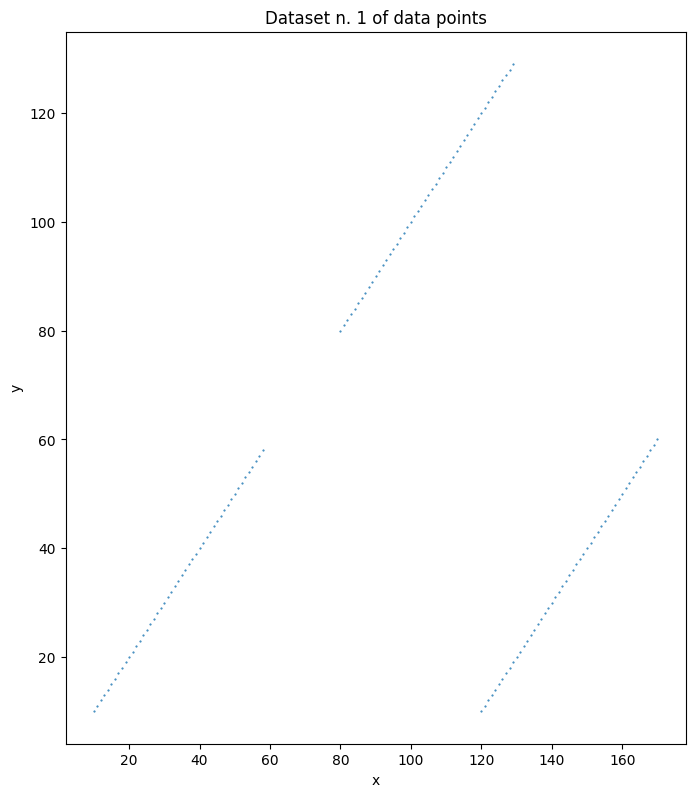

In [89]:
plot_dataset(feature_names1, data1)

The following is the program for plotting the dataset n.2

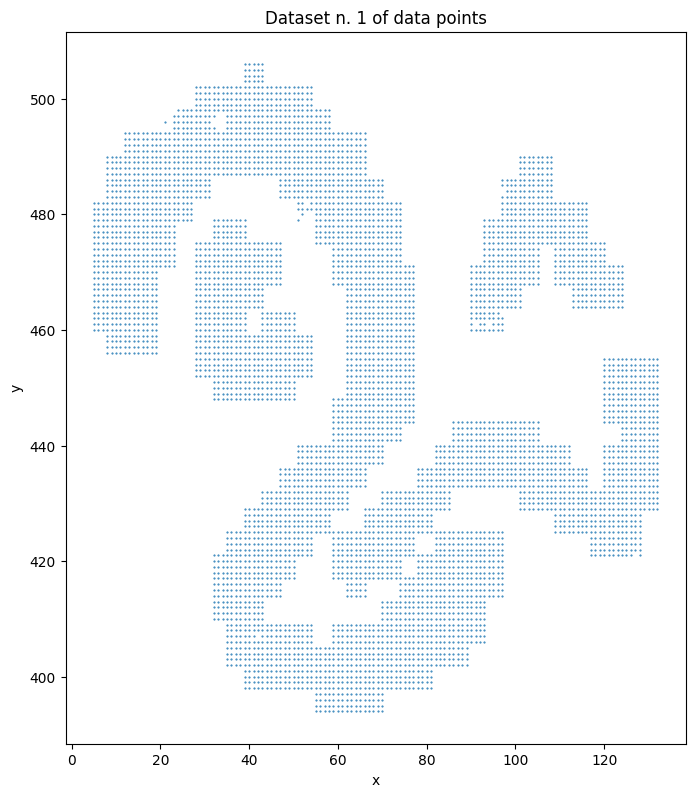

In [90]:
plot_dataset(feature_names2, data2)

The following is the program for plotting the dataset n.3

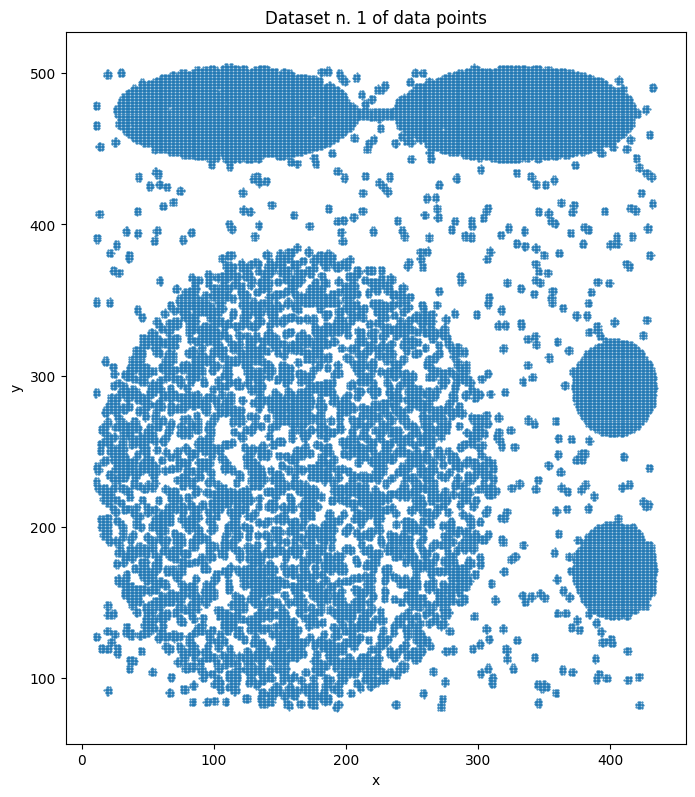

In [91]:
plot_dataset(feature_names3, data3)

## In the following program we cluster the dataset n.1 with K-means. 
From the plot of dataset n.1 we see 3 separated clusters. Thus k=3. 

In [92]:
import csv
import sys
from os.path import join

import numpy as np
 
file_path="datasets/"
file_name1="3-clusters.csv"

data1,feature_names1,n_samples1,n_features1 = load_data(file_path, file_name1)

kmean1 = run_kmeans(n_samples1, data1, k = 3)

n_samples=150


In the following program we plot the clusters

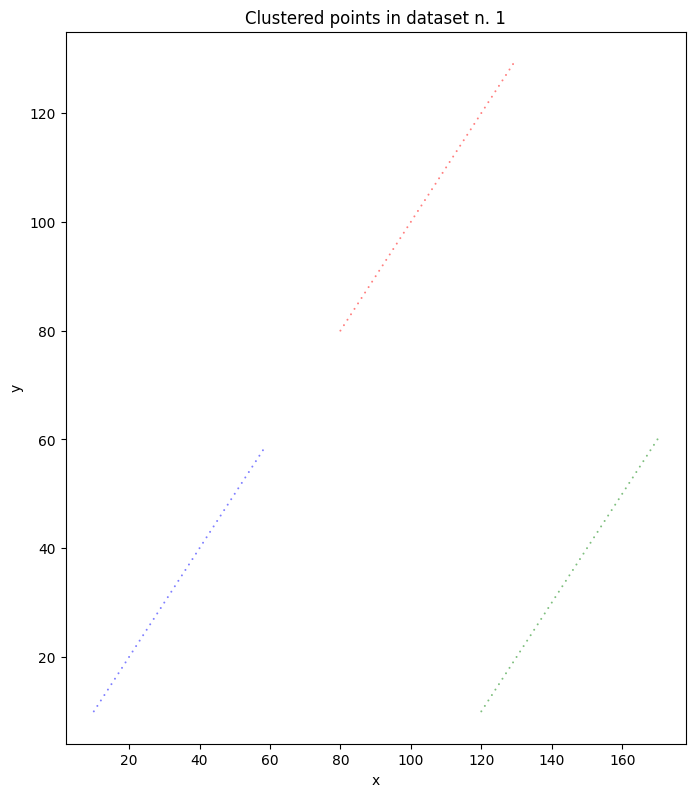

In [93]:
plot_clusters(data1, n_samples1, kmean1)

In the following cell I propose you to perform clustering with K-means on dataset2.

In [94]:
import csv
import sys
from os.path import join

import numpy as np


file_path="datasets/"
file_name2="dataset-DBSCAN.csv"     
data2,feature_names2,n_samples2,n_features2 = load_data(file_path, file_name2)

from sklearn.cluster import KMeans

np.random.seed(5)

kmeans2 = run_kmeans(n_samples2, data2, k = 3)

n_samples=6118


In the following you have to plot clustering results on dataset2.

**Answer:** 
how do you explain what it happens?

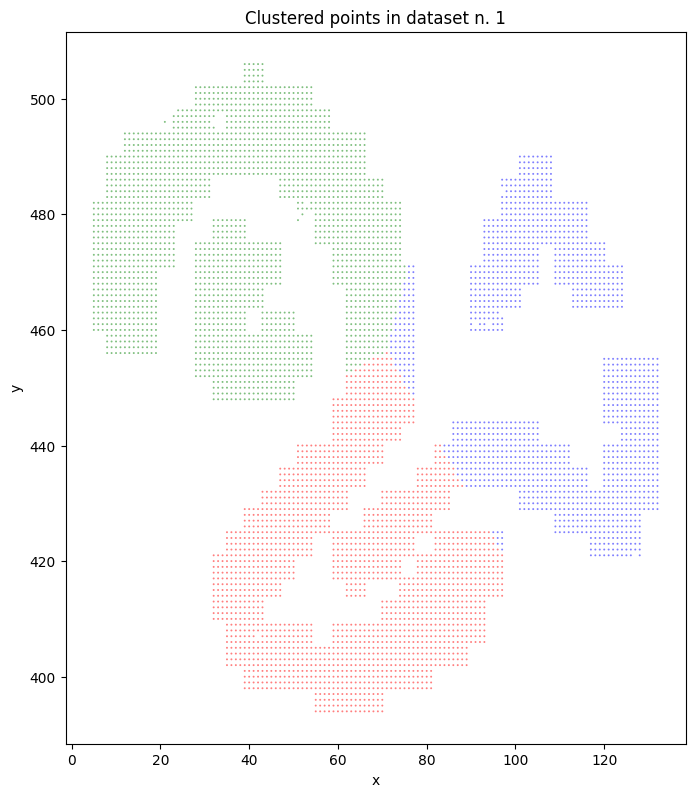

In [95]:
plot_clusters(data2, n_samples2, kmeans2)

In the following cell I propose you to perform clustering with K-means on the dataset3.

In [96]:
import csv
from os.path import join

import numpy as np
 
file_path="datasets/"
file_name3="CURE-complete.csv"    
data3,feature_names3,n_samples3,n_features3 = load_data(file_path, file_name3)

np.random.seed(5)

kmeans3 = run_kmeans(n_samples3, data3)

i=0
for i in range(n_samples3):
    print("Example n."+str(i)+"=("+str(data3[i,0])+","+str(data3[i,1])+")")
    print("in cluster n."+str(kmeans3.labels_[i]))

n_samples=86558
Example n.0=(9.0,480.0)
in cluster n.1
Example n.1=(9.0,479.0)
in cluster n.1
Example n.2=(9.0,478.0)
in cluster n.1
Example n.3=(9.0,477.0)
in cluster n.1
Example n.4=(9.0,467.0)
in cluster n.1
Example n.5=(9.0,466.0)
in cluster n.1
Example n.6=(9.0,465.0)
in cluster n.1
Example n.7=(9.0,464.0)
in cluster n.1
Example n.8=(9.0,392.0)
in cluster n.2
Example n.9=(9.0,391.0)
in cluster n.2
Example n.10=(9.0,390.0)
in cluster n.2
Example n.11=(9.0,350.0)
in cluster n.2
Example n.12=(9.0,349.0)
in cluster n.2
Example n.13=(9.0,348.0)
in cluster n.2
Example n.14=(9.0,347.0)
in cluster n.2
Example n.15=(9.0,290.0)
in cluster n.2
Example n.16=(9.0,289.0)
in cluster n.2
Example n.17=(9.0,288.0)
in cluster n.2
Example n.18=(9.0,287.0)
in cluster n.2
Example n.19=(9.0,240.0)
in cluster n.2
Example n.20=(9.0,239.0)
in cluster n.2
Example n.21=(9.0,238.0)
in cluster n.2
Example n.22=(9.0,231.0)
in cluster n.2
Example n.23=(9.0,230.0)
in cluster n.2
Example n.24=(9.0,229.0)
in cluste

In the following cell, I propose you to plot clustering results on dataset3.

**Answer:** 
how do you explain what it happens?

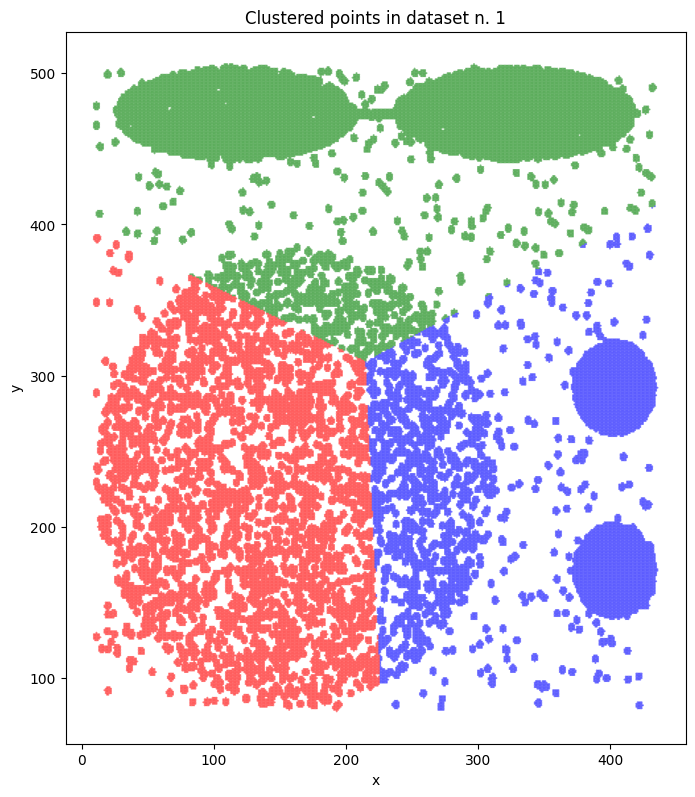

In [97]:
plot_clusters(data3, n_samples3, kmeans3)

In the following cells I propose you to write a program that computes with a statistical measure of your choice a quantitative evaluation of clusters in the three datasets.

**Note:**
It is advisable to execute K-means a certain number of times (let us try 10 times) and then select the clustering solution that gives the best value of the evaluation measure.

In [98]:
best_wss = 0
best_kmeans = None

for i in range(10):
    kmeans3 = run_kmeans(n_samples3, data3, k = 3)
    
    if(kmeans3.inertia_ > best_wss):
        best_wss = kmeans3.inertia_
        best_kmeans = kmeans3

best_wss

916142145.4043806

As already done with classification by k-nn, plot in the cell below the quantitative measure of your choice (used above) with respect to an increasing value of k (the number of clusters) so that the best value of k can be selected.

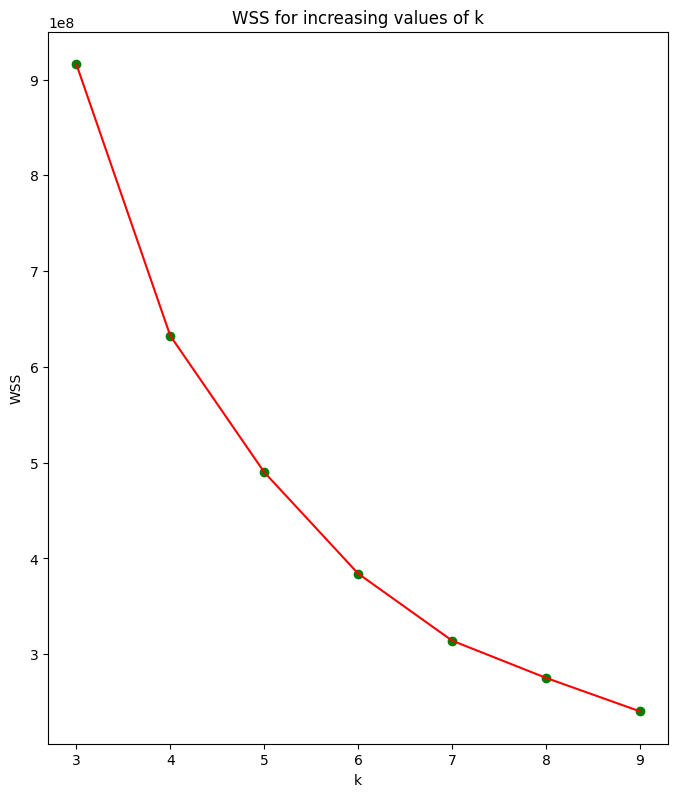

In [101]:
import matplotlib.pyplot as plt

wss_ = []
ks = range(3,10)

for i in ks:
    kmeans = run_kmeans(n_samples3, data3, k = i)
    wss_ = wss_ + [kmeans.inertia_]

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('WSS for increasing values of k')

ax.set_xlabel('k')
ax.set_ylabel('WSS')

plt.scatter(ks, wss_, marker='o', c="green")
plt.plot(ks, wss_, c="red")

In the following cell I propose you to run DBSCAN, instead, on one of the last two datasets: either dataset2 or dataset3. 

At the beginning try using a pair of Minpts and Eps of your choice.

**Note:**
If the data is too big, **sample it random, using a factor of 0.1.**

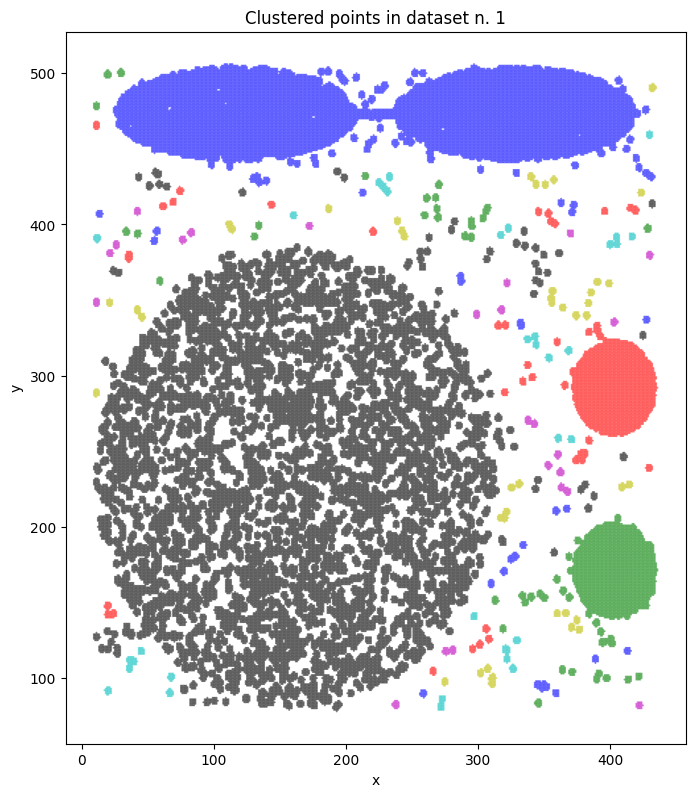

Noisy points: 0
Clusters: 134


In [106]:
from sklearn.cluster import DBSCAN

def print_dbscan(data, n_samples, dbscan, k):
    fig = plt.figure(figsize=(8,8))

    ax = fig.add_subplot(111)
    fig.subplots_adjust(top=1)
    ax.set_title('Clustered points in dataset n. 1')

    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # set the list of colors to be selected when plotting the different clusters
    color=['b','g','r','c','m','y','k','w'] * 30
    
    labels = dbscan.labels_# + 1
    #plot the dataset
    for clu in range(k+1):
        # collect the sequence of cooordinates of the points in each given cluster (determined by clu)
        data_list_x = [data[i,0] for i in range(n_samples) if labels[i]+1==clu]
        data_list_y = [data[i,1] for i in range(n_samples) if labels[i]+1==clu]
        plt.scatter(data_list_x, data_list_y, s=2, edgecolors='none', c=color[clu], alpha=0.5)


    plt.show()

def print_cluster_info(labels):
    noisy  = len(list(filter(lambda x: x == -1, labels)))
    print("Noisy points: " + str(noisy))
    clusters = len(np.unique(dbscan.labels_))
    if(noisy != 0 ):
        clusters -= 1
    print("Clusters: " + str(clusters))

dbscan = DBSCAN(eps=5, min_samples=10).fit(data3)
print_dbscan(data3, n_samples3, dbscan, k=len(np.unique(dbscan.labels_)))

print_cluster_info(dbscan.labels_)

In the following cell I propose you to: 

1.   Set *Minpts* to a number (say **10**).
2.   Compute the **reachability distance** of the **10-th nearest neighbour ** for each data-point.
3. Sort the set of reachability distances you obtained in an increasing way.
4. Plot the sorted reachability distances
5. Find the **elbow** of the diagram => it gives the eps value combined with Minpts=10.
6. Try this combined pair of parameters on the dataset you chose, with DBSCAN.

In [107]:
def random_sampling(data, rate):
    data_ = data

    train_size = rate
    rand_indices = np.arange(len(data_))
    np.random.shuffle(rand_indices)

    n_examples = int(np.round(len(data_)*train_size))
    indices = rand_indices[0:n_examples]

    return data_[indices]

In [108]:
data = random_sampling(data3, 0.01)

dist = []
k = 5

for x in data:
    d = []
    for j in data:
        d = d + [np.linalg.norm(x-j)]
    dist = dist + [np.sort(d)[k]]

In [ ]:
dist = np.sort(dist)

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
fig.subplots_adjust(top=1)
ax.set_title('Reachability distance of the ' + str(k) + '-th nearest neighbour')

ax.set_xlabel('Data-points')
ax.set_ylabel('Distance')

#plt.scatter(ks, wss_, marker='o', c="green")
plt.plot(range(len(data)), dist, c="red")


In [ ]:
dbscan = DBSCAN(eps=16.5, min_samples=500).fit(data3)
print_dbscan(data3, n_samples3, dbscan, k=len(np.unique(dbscan.labels_)))

In [ ]:
print_cluster_info(dbscan.labels_)